In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
%matplotlib inline

In [9]:
df = pd.read_csv('../datasets/2014_Financial_Data.csv')

In [10]:
df.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1


In [12]:
df = df.rename(columns = {'Unnamed: 0':'company'})

In [13]:
df.head()

,company,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 225 entries, company to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 6.5+ MB


In [28]:
df['Class'].value_counts().reset_index()

,index,Class
0,0,2174
1,1,1634


In [14]:
df.Sector.value_counts()

Financial Services        660
Healthcare                582
Technology                576
Industrials               501
Consumer Cyclical         457
Basic Materials           242
Real Estate               224
Energy                    221
Consumer Defensive        165
Utilities                  97
Communication Services     83
Name: Sector, dtype: int64

In [19]:
df[['Sector', 'company']].groupby('Sector').agg('count')

,company
Sector,
Basic Materials,242
Communication Services,83
Consumer Cyclical,457
Consumer Defensive,165
Energy,221
Financial Services,660
Healthcare,582
Industrials,501
Real Estate,224


In [37]:
sector_class_counts = df[['Sector', 'company', 'Class']].groupby(['Sector', 'Class']).agg('count')

In [38]:
sector_class_counts.head()

company
Sector                 Class         
Basic Materials        0          189
                       1           53
Communication Services 0           47
                       1           36
Consumer Cyclical      0          272

In [42]:
sector_class_pct = sector_class_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

In [44]:
sector_class_pct = sector_class_pct.rename(columns = {'company':'prop_success'})

In [45]:
sector_class_pct

,Sector,Class,prop_success
0,Basic Materials,0,78.099174
1,Basic Materials,1,21.900826
2,Communication Services,0,56.626506
3,Communication Services,1,43.373494
4,Consumer Cyclical,0,59.518600
5,Consumer Cyclical,1,40.481400
6,Consumer Defensive,0,46.060606
7,Consumer Defensive,1,53.939394
8,Energy,0,86.877828
9,Energy,1,13.122172


In [73]:
class_1 = sector_class_pct[sector_class_pct.Class == 1].sort_values(by='prop_success')

In [74]:
class_1[class_1.prop_success == class_1.prop_success.max()]

,Sector,Class,prop_success
11,Financial Services,1,62.424242


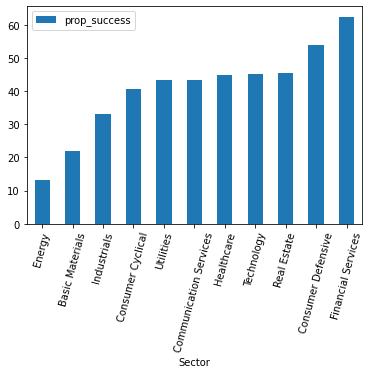

In [78]:
ax = class_1.plot.bar(x='Sector', y='prop_success', rot=75)

In [84]:
pd.get_dummies(df[['Sector', 'Class']]).corr().reset_index()

,index,Class,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
0,Class,1.000000,-0.110576,0.001399,-0.018118,0.047426,-0.149384,0.180532,0.016611,-0.078447,0.013264,0.019014,0.001272
1,Sector_Basic Materials,-0.110576,1.000000,-0.038886,-0.096203,-0.055441,-0.064662,-0.119281,-0.110649,-0.101396,-0.065126,-0.109975,-0.042117
2,Sector_Communication Services,0.001399,-0.038886,1.000000,-0.055125,-0.031768,-0.037052,-0.068349,-0.063402,-0.058100,-0.037318,-0.063016,-0.024133
3,Sector_Consumer Cyclical,-0.018118,-0.096203,-0.055125,1.000000,-0.078593,-0.091665,-0.169093,-0.156856,-0.143738,-0.092323,-0.155900,-0.059705
4,Sector_Consumer Defensive,0.047426,-0.055441,-0.031768,-0.078593,1.000000,-0.052825,-0.097447,-0.090394,-0.082835,-0.053205,-0.089844,-0.034407
5,Sector_Energy,-0.149384,-0.064662,-0.037052,-0.091665,-0.052825,1.000000,-0.113654,-0.105429,-0.096612,-0.062054,-0.104787,-0.040130
6,Sector_Financial Services,0.180532,-0.119281,-0.068349,-0.169093,-0.097447,-0.113654,1.000000,-0.194484,-0.178220,-0.114471,-0.193299,-0.074028
7,Sector_Healthcare,0.016611,-0.110649,-0.063402,-0.156856,-0.090394,-0.105429,-0.194484,1.000000,-0.165322,-0.106187,-0.179310,-0.068670
8,Sector_Industrials,-0.078447,-0.101396,-0.058100,-0.143738,-0.082835,-0.096612,-0.178220,-0.165322,1.000000,-0.097306,-0.164315,-0.062928
9,Sector_Real Estate,0.013264,-0.065126,-0.037318,-0.092323,-0.053205,-0.062054,-0.114471,-0.106187,-0.097306,1.000000,-0.105540,-0.040419
